## Import Packages and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections as col
import statistics
from scipy.interpolate import UnivariateSpline
import glob 
import matplotlib.patches as mpatches

## Load Data

In [2]:
fulldatatype=([('pulse','i8'),('frequency','i8'),('phase','i8'),('intensity','f8')])

In [3]:
modedatatype=([('file','i8'),('start','i8'),('end','i8'),('length','i8'),('mode','U1')])

In [4]:
mode_class = np.loadtxt(fname='mode_doc.csv', delimiter=',', dtype=modedatatype)

In [5]:
file_names = glob.glob("../Parkes_archive_files/4500nsub/2019*.Fp.pdv")
file_names=sorted(file_names)

In [6]:
maxf=4032
minf=704

## MODE SEQUENCE

In [7]:
mode_class[1]

(0, 25, 30, 6, 'C')

No handles with labels found to put in legend.


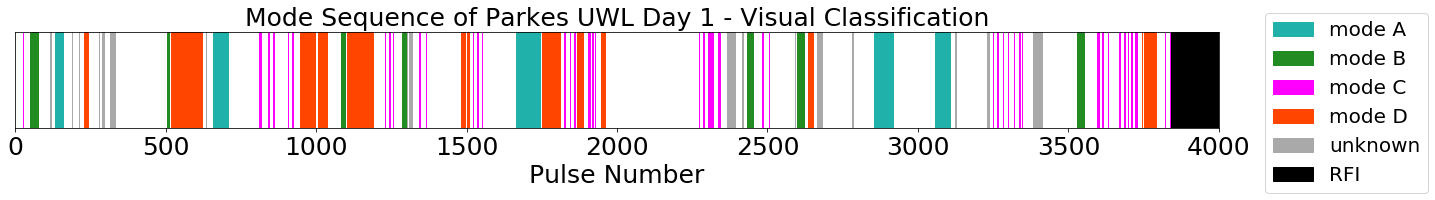

In [15]:
plt.figure(figsize=(20, 3))
plt.title('Mode Sequence of Parkes UWL Day 1 - Visual Classification',fontsize=25)
plt.xlabel('Pulse Number',fontsize=25)
plt.yticks([])
plt.xticks(fontsize=25)


for mode in mode_class:
    if mode[4]=='N':
        col='white'
    elif mode[4]=='A':
        col='lightseagreen'
    elif mode[4]=='B':
        col='forestgreen'
    elif mode[4]=='C':
        col='magenta'
    elif mode[4]=='D':
        col='orangered'
    elif mode[4]=='U':
        col='darkgrey'
    else:
        col='black'
        
    y=[0,0]
    y2=[1,1]
    start=250*mode[0]+mode[1]
    end=250*mode[0]+mode[2]
    x=[start,end]
    
    #plt.plot(x,y,color=col, lw=100)
    plt.fill_between(x, y, y2, facecolor=col)
        
plt.axis([0,4000,0,1])


N = mpatches.Patch(color='white', label='nulls')
A = mpatches.Patch(color='lightseagreen', label='mode A')
B = mpatches.Patch(color='forestgreen', label='mode B')
C = mpatches.Patch(color='magenta', label='mode C')
D = mpatches.Patch(color='orangered', label='mode D')
O = mpatches.Patch(color='black', label='RFI')
U = mpatches.Patch(color='darkgrey', label='unknown')

plt.legend()
plt.legend(handles=[A,B,C,D,U,O],bbox_to_anchor=(1.03,1.3), loc="upper left", prop={'size': 20})
plt.tight_layout()

plt.savefig('Sequence')


No handles with labels found to put in legend.


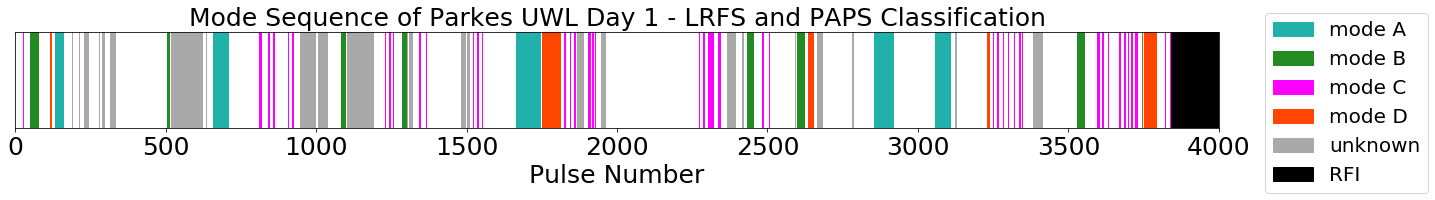

In [16]:
mode_class = np.loadtxt(fname='mode_doc2.csv', delimiter=',', dtype=modedatatype)

plt.figure(figsize=(20, 3))
plt.title('Mode Sequence of Parkes UWL Day 1 - LRFS and PAPS Classification',fontsize=25)
plt.xlabel('Pulse Number',fontsize=25)
plt.yticks([])
plt.xticks(fontsize=25)


for mode in mode_class:
    if mode[4]=='N':
        col='white'
    elif mode[4]=='A':
        col='lightseagreen'
    elif mode[4]=='B':
        col='forestgreen'
    elif mode[4]=='C':
        col='magenta'
    elif mode[4]=='D':
        col='orangered'
    elif mode[4]=='U':
        col='darkgrey'
    else:
        col='black'
        
    y=[0,0]
    y2=[1,1]
    start=250*mode[0]+mode[1]
    end=250*mode[0]+mode[2]
    x=[start,end]
    
    #plt.plot(x,y,color=col, lw=100)
    plt.fill_between(x, y, y2, facecolor=col)
        
plt.axis([0,4000,0,1])


N = mpatches.Patch(color='white', label='nulls')
A = mpatches.Patch(color='lightseagreen', label='mode A')
B = mpatches.Patch(color='forestgreen', label='mode B')
C = mpatches.Patch(color='magenta', label='mode C')
D = mpatches.Patch(color='orangered', label='mode D')
O = mpatches.Patch(color='black', label='RFI')
U = mpatches.Patch(color='darkgrey', label='unknown')

plt.legend()
plt.legend(handles=[A,B,C,D,U,O],bbox_to_anchor=(1.03,1.3), loc="upper left", prop={'size': 20})
plt.tight_layout()

plt.savefig('Sequence2')


No handles with labels found to put in legend.


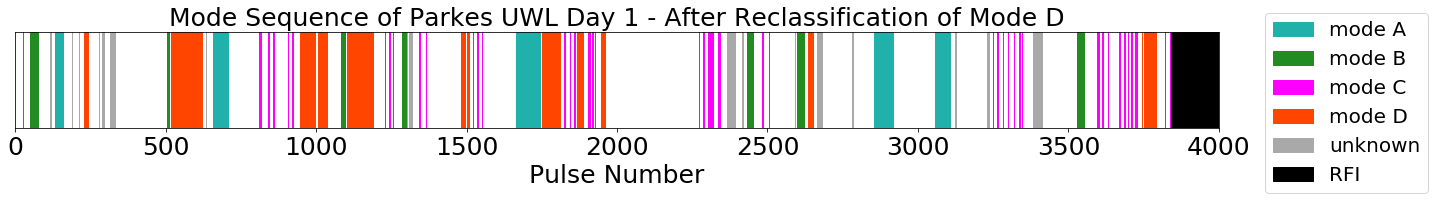

In [17]:
mode_class = np.loadtxt(fname='mode_doc_3.csv', delimiter=',', dtype=modedatatype)

plt.figure(figsize=(20, 3))
plt.title('Mode Sequence of Parkes UWL Day 1 - After Reclassification of Mode D',fontsize=25)
plt.xlabel('Pulse Number',fontsize=25)
plt.yticks([])
plt.xticks(fontsize=25)


for mode in mode_class:
    if mode[4]=='N':
        col='white'
    elif mode[4]=='A':
        col='lightseagreen'
    elif mode[4]=='B':
        col='forestgreen'
    elif mode[4]=='C':
        col='magenta'
    elif mode[4]=='D':
        col='orangered'
    elif mode[4]=='E':
        col='blueviolet'
    elif mode[4]=='U':
        col='darkgrey'
    else:
        col='black'
        
    y=[0,0]
    y2=[1,1]
    start=250*mode[0]+mode[1]
    end=250*mode[0]+mode[2]
    x=[start,end]
    
    #plt.plot(x,y,color=col, lw=100)
    plt.fill_between(x, y, y2, facecolor=col)
        
plt.axis([0,4000,0,1])


N = mpatches.Patch(color='white', label='nulls')
A = mpatches.Patch(color='lightseagreen', label='mode A')
B = mpatches.Patch(color='forestgreen', label='mode B')
C = mpatches.Patch(color='magenta', label='mode C')
D = mpatches.Patch(color='orangered', label='mode D')
D = mpatches.Patch(color='orangered', label='mode D')
E = mpatches.Patch(color='blueviolet', label='long mode D')
O = mpatches.Patch(color='black', label='RFI')
U = mpatches.Patch(color='darkgrey', label='unknown')

plt.legend()
plt.legend(handles=[A,B,C,D,U,O],bbox_to_anchor=(1.03,1.3), loc="upper left", prop={'size': 20})

plt.tight_layout()

plt.savefig('Sequence2-adjusted')


# FREQUENCY SCRUNCHED

## Create an Array of Pulses For Each Mode

In [165]:
#Creating arrays for each mode, which contain the pulses for that mode
A=np.array([], dtype=fulldatatype)
B=np.array([], dtype=fulldatatype)
C=np.array([], dtype=fulldatatype)
D=np.array([], dtype=fulldatatype)
AVE=np.array([], dtype=fulldatatype)

A_len=np.array([])
B_len=np.array([])
C_len=np.array([])
D_len=np.array([])

for a in range(16):
    #Load in a file at a time
    print('File:', a)
    current_file = np.loadtxt(fname=file_names[a], dtype=fulldatatype)

    f = mode_class['file'] == a
    
    #Mode Arrays
    
    #Mode A
    #Isolate the pulses which are mode A and part of current file
    m = mode_class['mode'] == 'A'
    p = np.logical_and(f,m)
    mA = mode_class[p]
    
    #Find the number of mode A bursts
    num_A=np.sum(m)
    
    #For every burst
    for segment in mA:
        #Record the length of burst
        A_len = np.append(A_len,segment[3])
        #Then for every pulse in segment
        for b in range(segment[1],segment[2]+1):
            #Add all file lines for this pulse to an array
            s = current_file['pulse'] == b
            A = np.append(A,current_file[s])

    #Mode B
    m = mode_class['mode'] == 'B'
    p = np.logical_and(f,m)
    mB = mode_class[p]
    
    num_B=np.sum(m)
    
    for segment in mB:
        B_len = np.append(B_len,segment[3])
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            B = np.append(B,current_file[s])
            
    #Mode C
    m = mode_class['mode'] == 'C'
    p = np.logical_and(f,m)
    mC = mode_class[p]
    
    num_C=np.sum(m)
    
    for segment in mC:
        C_len = np.append(C_len,segment[3])
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            C = np.append(C,current_file[s])
            
    #Mode D
    m = mode_class['mode'] == 'D'
    p = np.logical_and(f,m)
    mD = mode_class[p]
    
    num_D=np.sum(m)
    
    for segment in mD:
        D_len = np.append(D_len,segment[3])
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            D = np.append(D,current_file[s])
            
    #Average
    m = mode_class['mode'] != 'N'
    p = np.logical_and(f,m)
    mAVE = mode_class[p]
    
    num_AVE=np.sum(m)
    
    for segment in mAVE:
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            AVE = np.append(AVE,current_file[s])

File: 0


KeyboardInterrupt: 

In [ ]:
#Averaging the modes together
xA=np.array([])
yA=np.array([])

for c in range(1024):
    xA=np.append(xA,c)
    
    ph = A['phase'] == c
    it = A['intensity'][ph]
    
    yA=np.append(yA,sum(it)/len(it))
    
plt.plot(xA,yA/max(yA))
plt.title('Mode A')
plt.xlabel('Phase Bin')
plt.ylabel('Intensity')
plt.axis([500,900,-0.05,1.2])

In [56]:
expectedA=(0.5,660,6,2,695,20,1,740,8)
boundsA=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])


noise = sigmaClip(yA)
error = np.nanstd(noise[1])

#Fits gaussians to the data
params, cov, sigma = fitting_parameters(xA,yA,expectedA,boundsA)
fit = multi_gauss(xA,*params)
#Then finds the maxima of the fit. It only takes the largest two (given they are the outer maxima).
#Error for the maxima position is calculated by finding the positions of the fit at an intensity-noise level
profile_comp = gauss_peaks(fit, 1, 0, cov, params,minf,maxf,error)

print('Mode A Profile Stats:')
print('Peak 1 Location:\t', profile_comp[1][0],'degrees')
print('Peak 2 Location:\t', profile_comp[2][0],'degrees')

W10,W50,W10e,W50e=find_widths(fit,params, cov)
print('W10:\t\t\t',W10,'bins \t')
print('\t\t\t', W10*(360/1024),'degrees')
print('W50:\t\t\t',W50,'bins \t')
print('\t\t\t', W50*(360/1024),'degrees')

Mode A Profile Stats:
Peak 1 Location:	 245.87227603833983 degrees
Peak 2 Location:	 258.34303053993756 degrees
W10:			 118.30965952167946 bins 	
			 41.59323967559044 degrees
W50:			 89.74862860440066 bins 	
			 31.552252243734607 degrees


[500, 900, -0.05, 1.1]

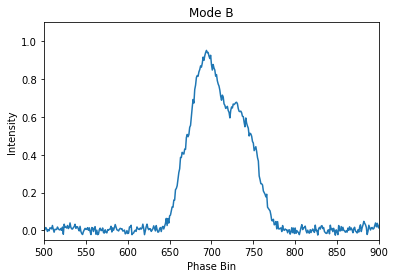

In [57]:
#Averaging the modes together
xB=np.array([])
yB=np.array([])

for c in range(1024):
    xB=np.append(xB,c)
    
    ph = B['phase'] == c
    it = B['intensity'][ph]
    
    yB=np.append(yB,sum(it)/len(it))
    
plt.plot(xB,yB/max(yB))
plt.title('Mode B')
plt.xlabel('Phase Bin')
plt.ylabel('Intensity')
plt.axis([500,900,-0.05,1.2])

In [58]:
expectedB=(0.2,660,6,2,685,20,1,740,8)
boundsB=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])

noise = sigmaClip(yB)
error = np.nanstd(noise[1])

#Fits gaussians to the data
params, cov, sigma = fitting_parameters(xB,yB,expectedB,boundsB)
fit = multi_gauss(xB,*params)
#Then finds the maxima of the fit. It only takes the largest two (given they are the outer maxima).
#Error for the maxima position is calculated by finding the positions of the fit at an intensity-noise level
profile_comp = gauss_peaks(fit, 1, 0, cov, params,minf,maxf,error)

print('Mode B Profile Stats:')
print('Peak 1 Location:\t', 693.7810088791413*(360/1024),'degrees')
print('Peak 2 Location:\t', 'Peak currently unresolvable')

W10,W50,W10e,W50e=find_widths(fit,params, cov)
print('W10:\t\t\t',W10,'bins \t')
print('\t\t\t', W10*(360/1024),'degrees')
print('W50:\t\t\t',W50,'bins \t')
print('\t\t\t', W50*(360/1024),'degrees')

Mode B Profile Stats:
Peak 1 Location:	 243.9073859340731 degrees
Peak 2 Location:	 Peak currently unresolvable
W10:			 118.53454202916134 bins 	
			 41.67229993212703 degrees
W50:			 79.20195636245603 bins 	
			 27.84443778367595 degrees


[500, 900, -0.05, 1.2]

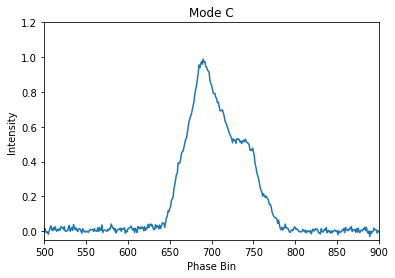

In [59]:
#Averaging the modes together
xC=np.array([])
yC=np.array([])

for c in range(1024):
    xC=np.append(xC,c)
    
    ph = C['phase'] == c
    it = C['intensity'][ph]
    
    yC=np.append(yC,sum(it)/len(it))
    
plt.plot(xC,yC/max(yC))
plt.title('Mode C')
plt.xlabel('Phase Bin')
plt.ylabel('Intensity')
plt.axis([500,900,-0.05,1.2])

In [60]:
expectedC=(0.5,660,6,2,695,20,1,740,8)
boundsC=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])

noise = sigmaClip(yC)
error = np.nanstd(noise[1])

#Fits gaussians to the data
params, cov, sigma = fitting_parameters(xC,yC,expectedC,boundsC)
fit = multi_gauss(xC,*params)
#Then finds the maxima of the fit. It only takes the largest two (given they are the outer maxima).
#Error for the maxima position is calculated by finding the positions of the fit at an intensity-noise level
profile_comp = gauss_peaks(fit, 1, 0, cov, params,minf,maxf,error)

print('Mode C Profile Stats:')
print('Peak 1 Location:\t', 692.0335710670835*(360/1024),'degrees')
print('Peak 2 Location:\t', 'Peak currently unresolvable')

W10,W50,W10e,W50e=find_widths(fit,params, cov)
print('W10:\t\t\t',W10,'bins \t')
print('\t\t\t', W10*(360/1024),'degrees')
print('W50:\t\t\t',W50,'bins \t')
print('\t\t\t', W50*(360/1024),'degrees')

peaks 1 [691.444392340463] band 0
Mode C Profile Stats:
Peak 1 Location:	 243.29305232827153 degrees
Peak 2 Location:	 Peak currently unresolvable
W10:			 125.04971849210449 bins 	
			 43.962791657380485 degrees
W50:			 78.45727305714729 bins 	
			 27.582635059153343 degrees


[500, 900, -0.05, 0.8]

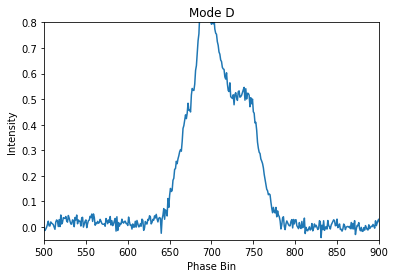

In [61]:
#Averaging the modes together
xD=np.array([])
yD=np.array([])

for c in range(1024):
    xD=np.append(xD,c)
    
    ph = D['phase'] == c
    it = D['intensity'][ph]
    
    yD=np.append(yD,sum(it)/len(it))
    
plt.plot(xD,yD/max(yD))
plt.title('Mode D')
plt.xlabel('Phase Bin')
plt.ylabel('Intensity')
plt.axis([500,900,-0.05,1.2])

In [62]:
expectedD=(0.2,660,6,2,685,20,1,740,8)
boundsD=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])

noise = sigmaClip(yD)
error = np.nanstd(noise[1])

#Fits gaussians to the data
params, cov, sigma = fitting_parameters(xD,yD,expectedD,boundsD)
fit = multi_gauss(xD,*params)
#Then finds the maxima of the fit. It only takes the largest two (given they are the outer maxima).
#Error for the maxima position is calculated by finding the positions of the fit at an intensity-noise level
profile_comp = gauss_peaks(fit, 1, 0, cov, params,minf,maxf,error)

print('Mode D Profile Stats:')
print('Peak 1 Location:\t', profile_comp[1][0],'degrees')
print('Peak 2 Location:\t', profile_comp[2][0],'degrees')

W10,W50,W10e,W50e=find_widths(fit,params, cov)
print('W10:\t\t\t',W10,'bins \t')
print('\t\t\t', W10*(360/1024),'degrees')
print('W50:\t\t\t',W50,'bins \t')
print('\t\t\t', W50*(360/1024),'degrees')

Mode D Profile Stats:
Peak 1 Location:	 244.42799494717605 degrees
Peak 2 Location:	 258.97553806750153 degrees
W10:			 124.2131859026988 bins 	
			 43.668698168917544 degrees
W50:			 76.9077302082278 bins 	
			 27.037873901330087 degrees


C:\Users\Lisas\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


[500, 900, -0.05, 1]

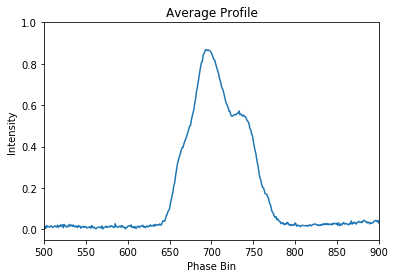

In [63]:
#Averaging the modes together
xAVE=np.array([])
yAVE=np.array([])

for c in range(1024):
    xAVE=np.append(xAVE,c)
    
    ph = AVE['phase'] == c
    it = AVE['intensity'][ph]
    
    yAVE=np.append(yAVE,sum(it)/len(it))
    
plt.plot(xAVE,yAVE/max(yAVE))
plt.title('Average Profile')
plt.xlabel('Phase Bin')
plt.ylabel('Intensity')
plt.axis([500,900,-0.05,1.2])

In [64]:
expectedAVE=(0.15,660,6,0.55,695,20,0.1,715,10,0.25,740,8)
boundsAVE=([0,625,0,0,675,0,0,712,0,0,720,0],[np.inf,675,np.inf,np.inf,725,np.inf,np.inf,740,np.inf,np.inf,760,np.inf])

noise = sigmaClip(yAVE)
error = np.nanstd(noise[1])

#Fits gaussians to the data
params, cov, sigma = fitting_parameters(xAVE,yAVE,expectedAVE,boundsAVE)
fit = multi_gauss(xAVE,*params)
#Then finds the maxima of the fit. It only takes the largest two (given they are the outer maxima).
#Error for the maxima position is calculated by finding the positions of the fit at an intensity-noise level
profile_comp = gauss_peaks(fit, 1, 0, cov, params,minf,maxf,error)

print('Average Profile Stats:')
print('Peak 1 Location:\t', profile_comp[1][0],'degrees')
print('Peak 2 Location:\t', profile_comp[2][0],'degrees')

W10,W50,W10e,W50e=find_widths(fit,params, cov)
print('W10:\t\t\t',W10,'bins \t')
print('\t\t\t', W10*(360/1024),'degrees')
print('W50:\t\t\t',W50,'bins \t')
print('\t\t\t', W50*(360/1024),'degrees')

Average Profile Stats:
Peak 1 Location:	 244.3962745174343 degrees
Peak 2 Location:	 257.99076038315906 degrees
W10:			 124.33169993532636 bins 	
			 43.71036325851317 degrees
W50:			 79.8971765606592 bins 	
			 28.088851134606752 degrees


In [ ]:
plt.plot(xA,yA/max(yA),label='mode A', color='lightseagreen')
plt.plot(xA,yB/max(yB),label='mode B', color='forestgreen')
plt.plot(xA,yA/max(yA),label='mode C', color='magenta')
plt.plot(xA,yA/max(yA),label='mode D', color='orangered')
plt.plot(xAVE,yAVE/max(yAVE),label='average', color='black')
plt.title('Average Profile')
plt.xlabel('Phase Bin')
plt.ylabel('Intensity')
plt.legend()
plt.axis([500,900,-0.05,1.2])

Mode A Stats:
Number of Bursts: 6
Length Min, Ave and Max: 2.0 49.166666666666664 84.0


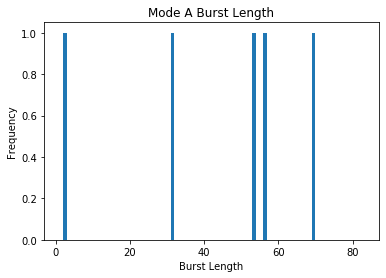

In [65]:
plt.hist(A_len, range(1,int(max(A_len))));
plt.title('Mode A Burst Length')
plt.xlabel('Burst Length')
plt.ylabel('Frequency')
print('Mode A Stats:')
print('Number of Bursts:', num_A)
print('Length Min, Ave and Max:', min(A_len),np.average(A_len), max(A_len))

Mode B Stats:
Number of Bursts: 7
Length Min, Ave and Max: 13.0 22.0 28.0


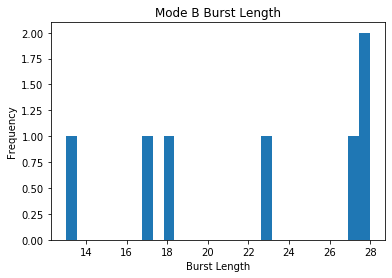

In [66]:
plt.hist(B_len, int(max(B_len)));
plt.title('Mode B Burst Length')
plt.xlabel('Burst Length')
plt.ylabel('Frequency')
print('Mode B Stats:')
print('Number of Bursts:', num_B)
print('Length Min, Ave and Max:', min(B_len),np.average(B_len), max(B_len))

Mode C Stats:
Number of Bursts: 49
Length Min, Ave and Max: 1.0 6.122448979591836 20.0


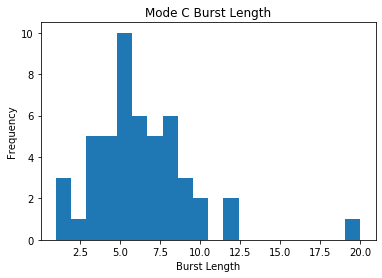

In [67]:
plt.hist(C_len, int(max(C_len)));
plt.title('Mode C Burst Length')
plt.xlabel('Burst Length')
plt.ylabel('Frequency')
print('Mode C Stats:')
print('Number of Bursts:', num_C)
print('Length Min, Ave and Max:', min(C_len),np.average(C_len), max(C_len))

Mode D Stats:
Number of Bursts: 7
Length Min, Ave and Max: 6.0 22.0 44.0


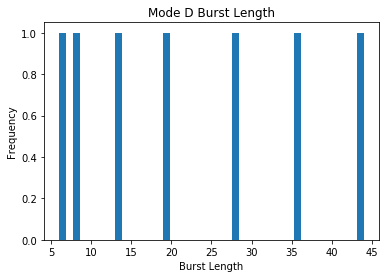

In [68]:
plt.hist(D_len, int(max(D_len)));
plt.title('Mode D Burst Length')
plt.xlabel('Burst Length')
plt.ylabel('Frequency')
print('Mode D Stats:')
print('Number of Bursts:', num_D)
print('Length Min, Ave and Max:', min(D_len),np.average(D_len), max(D_len))

# ACROSS FREQUENCY

### Create Pulse Arrays for each mode

In [69]:
file_names = glob.glob("../Parkes_archive_files/4500nsub/2019*.f128p.pdv")
file_names=sorted(file_names)

In [70]:
#Creating arrays for each mode, which contain the pulses for that mode
A=np.array([], dtype=fulldatatype)
B=np.array([], dtype=fulldatatype)
C=np.array([], dtype=fulldatatype)
D=np.array([], dtype=fulldatatype)
AVE=np.array([], dtype=fulldatatype)

A_len=np.array([])
B_len=np.array([])
C_len=np.array([])
D_len=np.array([])

for a in range(16):
    #Load in a file at a time
    print('File:', a)
    current_file = np.loadtxt(fname=file_names[a], dtype=fulldatatype)

    f = mode_class['file'] == a
    
    #Mode Arrays
    
    #Mode A
    #Isolate the pulses which are mode A and part of current file
    m = mode_class['mode'] == 'A'
    p = np.logical_and(f,m)
    mA = mode_class[p]
    
    #Find the number of mode A bursts
    num_A=np.sum(m)
    
    #For every burst
    for segment in mA:
        #Record the length of burst
        A_len = np.append(A_len,segment[3])
        #Then for every pulse in segment
        for b in range(segment[1],segment[2]+1):
            #Add all file lines for this pulse to an array
            s = current_file['pulse'] == b
            A = np.append(A,current_file[s])

    #Mode B
    m = mode_class['mode'] == 'B'
    p = np.logical_and(f,m)
    mB = mode_class[p]
    
    num_B=np.sum(m)
    
    for segment in mB:
        B_len = np.append(B_len,segment[3])
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            B = np.append(B,current_file[s])
            
    #Mode C
    m = mode_class['mode'] == 'C'
    p = np.logical_and(f,m)
    mC = mode_class[p]
    
    num_C=np.sum(m)
    
    for segment in mC:
        C_len = np.append(C_len,segment[3])
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            C = np.append(C,current_file[s])
            
    #Mode D
    m = mode_class['mode'] == 'D'
    p = np.logical_and(f,m)
    mD = mode_class[p]
    
    num_D=np.sum(m)
    
    for segment in mD:
        D_len = np.append(D_len,segment[3])
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            D = np.append(D,current_file[s])
            
    #Average
    m = mode_class['mode'] != 'N'
    p = np.logical_and(f,m)
    mAVE = mode_class[p]
    
    num_AVE=np.sum(m)
    
    for segment in mAVE:
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            AVE = np.append(AVE,current_file[s])

File: 0
File: 1
File: 2
File: 3
File: 4
File: 5
File: 6
File: 7
File: 8
File: 9
File: 10
File: 11
File: 12
File: 13
File: 14
File: 15


### Making an average profile for each mode

In [71]:
A_ave=np.array([], dtype=fulldatatype)
B_ave=np.array([], dtype=fulldatatype)
C_ave=np.array([], dtype=fulldatatype)
D_ave=np.array([], dtype=fulldatatype)
AVE_ave=np.array([], dtype=fulldatatype)

In [72]:
#Averaging the modes together

for d in range(103):
    print('Frequency band:', d)
    if d in A['frequency']:
        e = A['frequency'] == d
        A_freq= A[e]
        for c in range(1024):
            ph = A_freq['phase'] == c
            it = A_freq['intensity'][ph]
    
            A_ave=np.append(A_ave,np.array((0, d, c, sum(it)/len(it)),dtype=fulldatatype))
        
    if d in B['frequency']:
        e = B['frequency'] == d
        B_freq= B[e]
        for c in range(1024):
            ph = B_freq['phase'] == c
            it = B_freq['intensity'][ph]
    
            B_ave=np.append(B_ave,np.array((0, d, c, sum(it)/len(it)),dtype=fulldatatype))
        
    if d in C['frequency']:
        e = C['frequency'] == d
        C_freq= C[e]
        for c in range(1024):
            ph = C_freq['phase'] == c
            it = C_freq['intensity'][ph]
    
            C_ave=np.append(C_ave,np.array((0, d, c, sum(it)/len(it)),dtype=fulldatatype))
        
    if d in D['frequency']:
        e = D['frequency'] == d
        D_freq= D[e]
        for c in range(1024):
            ph = D_freq['phase'] == c
            it = D_freq['intensity'][ph]
    
            D_ave=np.append(D_ave,np.array((0, d, c, sum(it)/len(it)),dtype=fulldatatype))
    
    if d in AVE['frequency']:
        e = AVE['frequency'] == d
        AVE_freq= AVE[e]
        for c in range(1024):
            ph = AVE_freq['phase'] == c
            it = AVE_freq['intensity'][ph]
    
            AVE_ave=np.append(AVE_ave,np.array((0, d, c, sum(it)/len(it)),dtype=fulldatatype))

Frequency band: 0
Frequency band: 1
Frequency band: 2
Frequency band: 3
Frequency band: 4
Frequency band: 5
Frequency band: 6
Frequency band: 7
Frequency band: 8
Frequency band: 9
Frequency band: 10
Frequency band: 11
Frequency band: 12
Frequency band: 13
Frequency band: 14
Frequency band: 15
Frequency band: 16
Frequency band: 17
Frequency band: 18
Frequency band: 19
Frequency band: 20
Frequency band: 21
Frequency band: 22
Frequency band: 23
Frequency band: 24
Frequency band: 25
Frequency band: 26
Frequency band: 27
Frequency band: 28
Frequency band: 29
Frequency band: 30
Frequency band: 31
Frequency band: 32
Frequency band: 33
Frequency band: 34
Frequency band: 35
Frequency band: 36
Frequency band: 37
Frequency band: 38
Frequency band: 39
Frequency band: 40
Frequency band: 41
Frequency band: 42
Frequency band: 43
Frequency band: 44
Frequency band: 45
Frequency band: 46
Frequency band: 47
Frequency band: 48
Frequency band: 49
Frequency band: 50
Frequency band: 51
Frequency band: 52
Fre

## Gaussian Fittings of Profiles

#### Single Frequency Test

In [73]:
no_freq_bands=max(AVE_ave['frequency'])
averageprofiles=AVE_ave

#Takes a single frequency band out of all the profiles for analysis.
freqband =13

f = averageprofiles['frequency'] == freqband
x=averageprofiles['phase'][f]
y=averageprofiles['intensity'][f]

#Expected is taken from Peaks and Gaussian fittings of frequency band 73
#expectedA=(0.5,660,6,2,695,20,1,740,8)
#boundsA=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])
#expectedB=(0.2,660,6,2,685,20,1,740,8)
#boundsB=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])
#expectedC=(0.5,660,6,2,695,20,1,740,8)
#boundsC=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])
#expectedD=(0.2,660,6,2,685,20,1,740,8)
#boundsD=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])
expectedAVE=(0.15,660,6,0.55,695,20,0.1,715,10,0.25,740,8)
boundsAVE=([0,625,0,0,675,0,0,712,0,0,720,0],[np.inf,675,np.inf,np.inf,725,np.inf,np.inf,740,np.inf,np.inf,760,np.inf])


noise = sigmaClip(y)
error = np.nanstd(noise[1])

#Fits three gaussians to the data
params, cov, sigma = fitting_parameters(x,y,expectedAVE,boundsAVE)
fit = multi_gauss(x,*params)
#Then finds the maxima of the fit. It only takes the largest two (given they are the outer maxima).
#Error for the maxima position is calculated by finding the positions of the fit at an intensity-noise level
profile_comp = gauss_peaks(fit, no_freq_bands, freqband, cov, params,minf,maxf,error)

#py.axis([200,400,-0.05,0.07])

[600, 825, -0.1, 0.45]

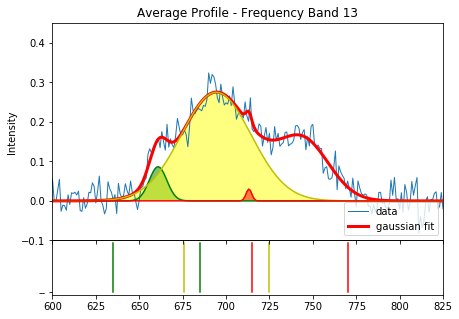

In [74]:
#Plot fill parameters
params1 = params[0:3]
params2 = params[3:6]
params3 = params[6:9]
gfit1 = gauss(x, *params1)
gfit2 = gauss(x, *params2)
gfit3 = gauss(x, *params3)
#Boundary parameters
yt=[0,1]
x1=[635,635]
x2=[685,685]
x3=[676,676]
x4=[725,725]
x5=[715,715]
x6=[770,770]
    
plot = plt.figure(figsize=(7, 5))
grid = plt.GridSpec(5, 1, hspace=0, wspace=0)
boundary = plot.add_subplot(grid[4, 0])
main_ax = plot.add_subplot(grid[0:4, 0], sharex=boundary)


main_ax.plot(x, y, lw=1, label='data')
main_ax.plot(x,fit,color='red',lw=3,label='gaussian fit')
main_ax.plot(x, gfit1, "g")
main_ax.fill_between(x, gfit1.min(), gfit1, facecolor="green", alpha=0.5)
main_ax.plot(x, gfit2, "y")
main_ax.fill_between(x, gfit2.min(), gfit2, facecolor="yellow", alpha=0.5)
main_ax.plot(x, gfit3, "r")
main_ax.fill_between(x, gfit3.min(), gfit3, facecolor="red", alpha=0.5)
#main_ax.plot(x, gfit4, "b")
#main_ax.fill_between(x, gfit4.min(), gfit4, facecolor="blue", alpha=0.5)
boundary.plot(x1,yt, "g", '--')
boundary.plot(x2,yt, "g", '--')
boundary.plot(x3,yt, "y", '--')
boundary.plot(x4,yt, "y", '--')
boundary.plot(x5,yt, "r", '--')
boundary.plot(x6,yt, "r", '--')

plt.title("Average Profile - Frequency Band 13")

plt.ylabel('Intensity')
plt.xlabel('Frequency (Bins)')
main_ax.legend(loc='lower right')
boundary.label_outer()
main_ax.label_outer()
plt.axis([600,825,-0.1,0.45])

[200, 300, -0.1, 0.5]

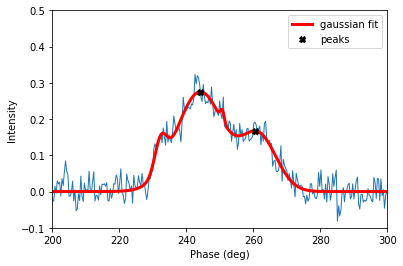

In [75]:
plot_peaks(x*(360/1024),y,profile_comp)
plt.axis([200,300,-0.1,0.5])

#### All Frequencies

##### Mode A

In [76]:
expectedA=(0.5,660,6,2,695,20,1,740,8)
boundsA=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])

maxf=4032
minf=704

fit_components=component_positions(A_ave,expectedA,boundsA,minf,maxf)

C:\Users\Lisas\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


Too noisey 12
peaks 2 [655.0219122596293, 698.5355558485651] band 12
peaks 2 [664.7955695809954, 696.1692111827685] band 15
Too noisey 25
peaks 3 [662.2414000308607, 699.1210523771502, 746.2477848108223] band 25


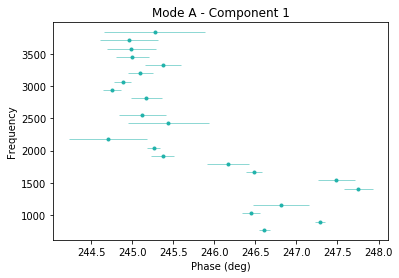

In [77]:
Alin1,y_comp=plot_comp_movement(fit_components,'Mode A - Component 1','lightseagreen',1,2)
plt.savefig('MAC1')

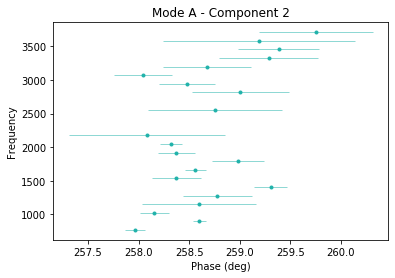

In [78]:
Alin2,y_comp=plot_comp_movement(fit_components,'Mode A - Component 2','lightseagreen',2,2)
plt.savefig('MAC2')

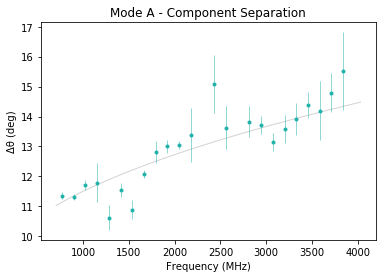

In [79]:
y_sep,Asep,Aparams=plot_sep_movement(fit_components,'Mode A - Component Separation','lightseagreen',2.5)
plt.savefig('MAsep')

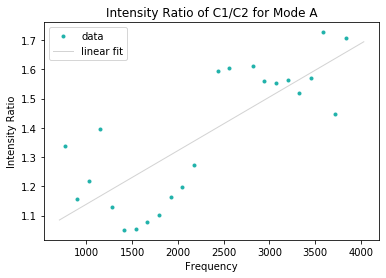

In [80]:
y_sep,Aint,Aiparams=plot_intensities(fit_components, 'Intensity Ratio of C1/C2 for Mode A', 'lightseagreen')
plt.savefig('MAI')

##### Mode B

In [81]:
expectedB=(0.2,660,6,2,685,20,1,740,8)
boundsB=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])

fit_components=component_positions(B_ave,expectedB,boundsB,minf,maxf)

C:\Users\Lisas\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


peaks 1 [696.0680767964035] band 0
peaks 1 [696.8609684700507] band 1
peaks 1 [694.5533411910291] band 2
peaks 1 [699.9744973868766] band 4
peaks 1 [691.8388245881837] band 7
Too noisey 12
peaks 2 [654.9374572608028, 683.9319496534562] band 12
peaks 2 [661.9949615590452, 691.921406501195] band 15
Too noisey 24
peaks 2 [665.1262659176022, 693.7636346838607] band 24
Too noisey 25
peaks 3 [653.2843615097087, 689.0139867087232, 735.316234391688] band 25


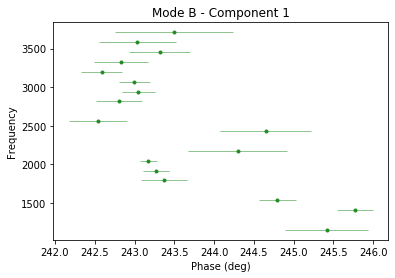

In [82]:
Blin1,y_comp=plot_comp_movement(fit_components,'Mode B - Component 1','forestgreen',1,3)
plt.savefig('MBC1')

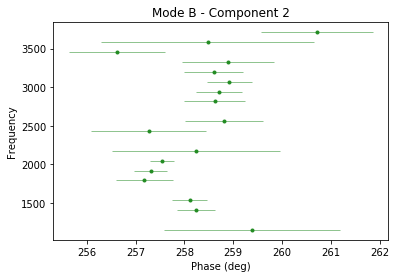

In [83]:
Blin2,y_comp=plot_comp_movement(fit_components,'Mode B - Component 2','forestgreen',2,3)
plt.savefig('MBC2')

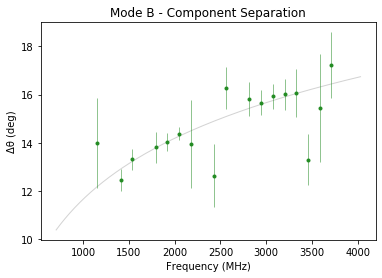

In [84]:
y_sep,Bsep,Bparams=plot_sep_movement(fit_components,'Mode B - Component Separation','forestgreen',2.5)
plt.savefig('MBsep')

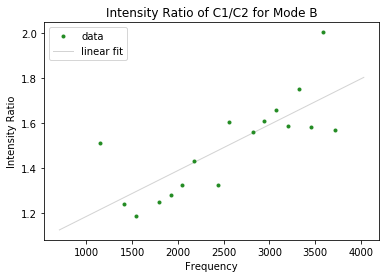

In [85]:
y_sep,Bint,Biparams=plot_intensities(fit_components, 'Intensity Ratio of C1/C2 for Mode B', 'forestgreen')
plt.savefig('MBI')

##### Mode C

In [86]:
expectedC=(0.5,660,6,2,695,20,1,740,8)
boundsC=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])

fit_components=component_positions(C_ave,expectedC,boundsC,minf,maxf)

C:\Users\Lisas\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


peaks 1 [693.4620615546596] band 0
peaks 1 [690.6874241269403] band 2
peaks 1 [697.6228700543652] band 4
peaks 1 [692.858938536158] band 7
peaks 1 [692.0949932370385] band 8
peaks 1 [691.1583258672356] band 9
peaks 2 [658.3420330904534, 688.720213698873] band 11
peaks 2 [656.6766431574308, 684.3958482169954] band 12
peaks 1 [689.1163709904157] band 14


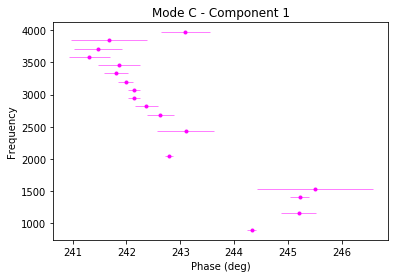

In [87]:
Clin1,y_comp=plot_comp_movement(fit_components,'Mode C - Component 1','magenta',1,3)
plt.savefig('MCC1')

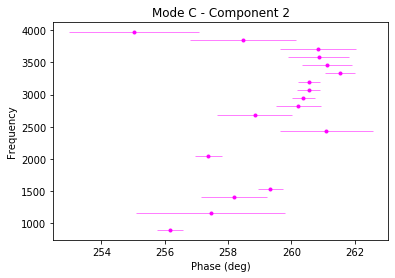

In [88]:
Clin2,y_comp=plot_comp_movement(fit_components,'Mode C - Component 2','magenta',2,3)
plt.savefig('MCC2')

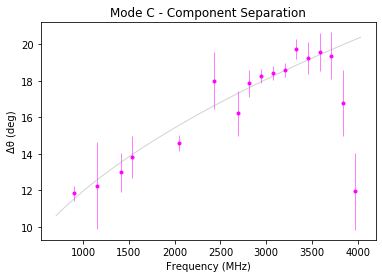

In [89]:
y_sep,Csep,Cparams=plot_sep_movement(fit_components,'Mode C - Component Separation','magenta',2.5)
plt.savefig('MCsep')

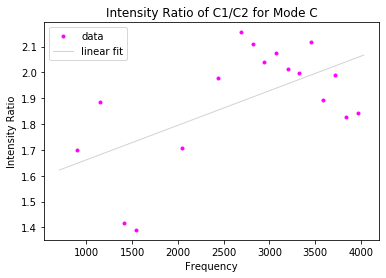

In [90]:
y_sep,Cint,Ciparams=plot_intensities(fit_components, 'Intensity Ratio of C1/C2 for Mode C', 'magenta')
plt.savefig('MCI')

##### Mode D

In [91]:
expectedD=(0.2,660,6,2,685,20,1,740,8)
boundsD=([0,635,0,0,675,0,0,715,0],[np.inf,685,np.inf,np.inf,725,np.inf,np.inf,770,np.inf])

fit_components=component_positions(D_ave,expectedD,boundsD,minf,maxf)

C:\Users\Lisas\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


peaks 1 [699.0191803834745] band 1
peaks 1 [695.7592532139474] band 2
peaks 1 [696.4948435497544] band 3
peaks 2 [666.1870308396227, 709.9189797399594] band 4
Too noisey 12
peaks 3 [645.3216826023046, 695.1813022755201, 738.976298580428] band 12
Too noisey 13
peaks 2 [652.1207617934687, 688.9429138088407] band 13


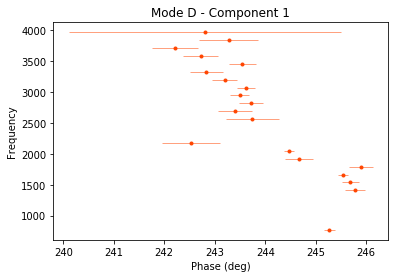

In [92]:
Dlin1,y_comp=plot_comp_movement(fit_components,'Mode D - Component 1','orangered',1,3)
plt.savefig('MDC1')

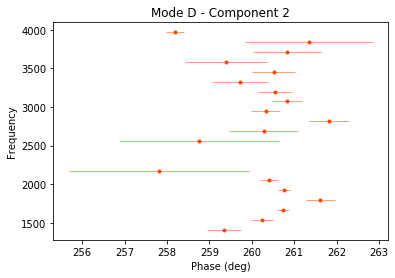

In [93]:
Dlin2,y_comp=plot_comp_movement(fit_components,'Mode D - Component 2','orangered',2,3)
plt.savefig('MDC2')

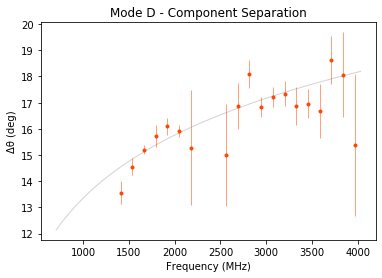

In [94]:
y_sep,Dsep,Dparams=plot_sep_movement(fit_components,'Mode D - Component Separation','orangered',2.5)
plt.savefig('MDsep')

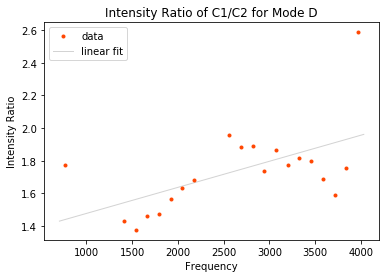

In [95]:
y_sep,Dint,Diparams=plot_intensities(fit_components, 'Intensity Ratio of C1/C2 for Mode D', 'orangered')
plt.savefig('MDI')

##### Average Overall

In [96]:
expectedAVE=(0.15,660,6,0.55,695,20,0.1,715,10,0.25,740,8)
boundsAVE=([0,625,0,0,675,0,0,712,0,0,720,0],[np.inf,675,np.inf,np.inf,725,np.inf,np.inf,740,np.inf,np.inf,760,np.inf])

fit_components=component_positions(AVE_ave,expectedAVE,boundsAVE,minf,maxf)

peaks 2 [661.3571153140607, 704.2723039444508] band 4


C:\Users\Lisas\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


peaks 1 [695.3200737080882] band 11
peaks 2 [655.0876631545141, 687.8667792964808] band 12


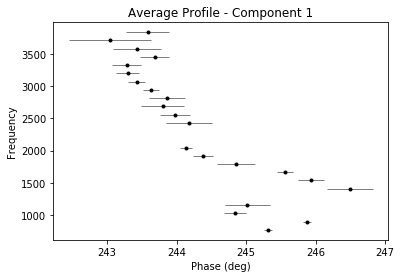

In [97]:
AVElin1,y_comp=plot_comp_movement(fit_components,'Average Profile - Component 1','black',1,3)
plt.savefig('AVEC1')

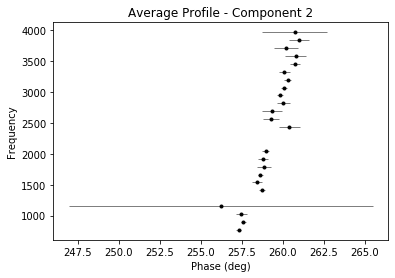

In [98]:
AVElin2,y_comp=plot_comp_movement(fit_components,'Average Profile - Component 2','black',2,3)
plt.savefig('AVEC2')

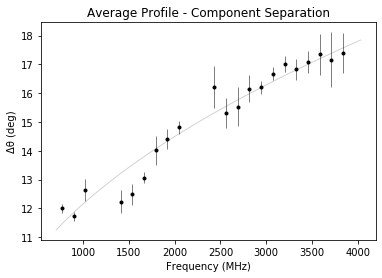

In [99]:
y_sep,AVEsep,AVEparams=plot_sep_movement(fit_components,'Average Profile - Component Separation','black',1.6)
plt.savefig('AVEsep')

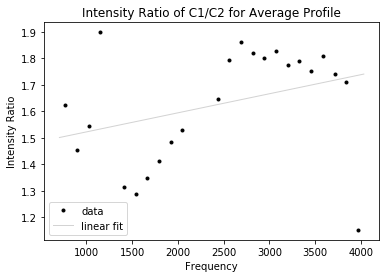

In [100]:
y_sep,AVEint,AVEiparams=plot_intensities(fit_components, 'Intensity Ratio of C1/C2 for Average Profile', 'black')
plt.savefig('AVEI')

### Direct Comparison

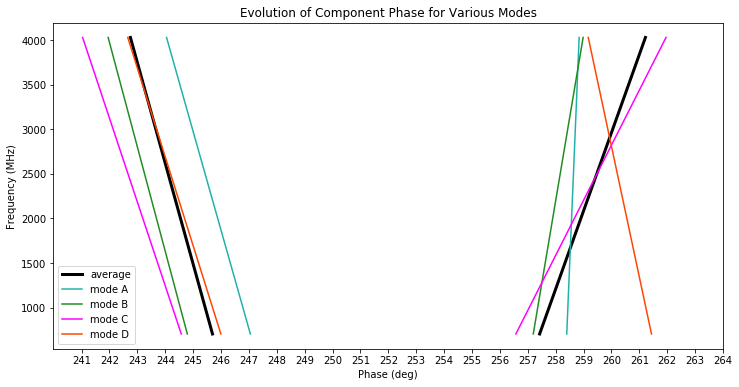

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(AVElin1,y_comp, color='black',lw=3,label='average',zorder=0.5)
plt.plot(Alin1,y_comp, color='lightseagreen',lw=1.5,label='mode A')
plt.plot(Blin1,y_comp, color='forestgreen',lw=1.5,label='mode B')
plt.plot(Clin1,y_comp, color='magenta',lw=1.5,label='mode C')
plt.plot(Dlin1,y_comp, color='orangered',lw=1.5,label='mode D')
plt.plot(AVElin2,y_comp, color='black',lw=3,zorder=0.5)
plt.plot(Alin2,y_comp, color='lightseagreen',lw=1.5)
plt.plot(Blin2,y_comp, color='forestgreen',lw=1.5)
plt.plot(Clin2,y_comp, color='magenta',lw=1.5)
plt.plot(Dlin2,y_comp, color='orangered',lw=1.5)

plt.legend()
plt.title('Evolution of Component Phase for Various Modes')
plt.xticks(np.arange(241, 265, 1.0))
plt.xlabel('Phase (deg)')
plt.ylabel('Frequency (MHz)')
plt.savefig('CompMove')

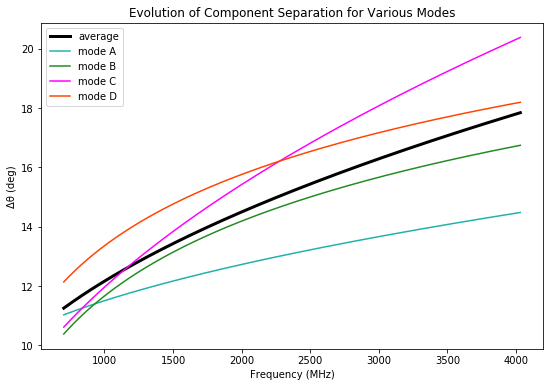

In [102]:
plt.figure(figsize=(9, 6))
plt.plot(y_sep,AVEsep, color='black',lw=3,label='average',zorder=0.5)
plt.plot(y_sep,Asep, color='lightseagreen',lw=1.5,label='mode A')
plt.plot(y_sep,Bsep, color='forestgreen',lw=1.5,label='mode B')
plt.plot(y_sep,Csep, color='magenta',lw=1.5,label='mode C')
plt.plot(y_sep,Dsep, color='orangered',lw=1.5,label='mode D')
plt.legend()
plt.title('Evolution of Component Separation for Various Modes')
plt.ylabel('\u0394\u03B8 (deg)')
plt.xlabel('Frequency (MHz)')
plt.savefig('Separation')

In [103]:
print(f'Average Profile: \t \u0394\u03B8 = {AVEparams[0]:.3f} \u03BD^{AVEparams[1]:.3f} + {AVEparams[2]:.3f} \n')
print(f'Mode A: \t\t \u0394\u03B8 = {Aparams[0]:.3f} \u03BD^{Aparams[1]:.3f} + {Aparams[2]:.3f} \n')
print(f'Mode B: \t\t \u0394\u03B8 = {Bparams[0]:.3f} \u03BD^{Bparams[1]:.3f} + {Bparams[2]:.3f} \n')
print(f'Mode C: \t\t \u0394\u03B8 = {Cparams[0]:.3f} \u03BD^{Cparams[1]:.3f} + {Cparams[2]:.3f} \n')
print(f'Mode D: \t\t \u0394\u03B8 = {Dparams[0]:.3f} \u03BD^{Dparams[1]:.3f} + {Dparams[2]:.3f} \n')

Average Profile: 	 Δθ = 0.178 ν^0.500 + 6.523 

Mode A: 		 Δθ = 0.093 ν^0.500 + 8.551 

Mode B: 		 Δθ = 8518.655 ν^0.000 + -8532.135 

Mode C: 		 Δθ = 0.264 ν^0.500 + 3.603 

Mode D: 		 Δθ = 10145.239 ν^0.000 + -10155.834 



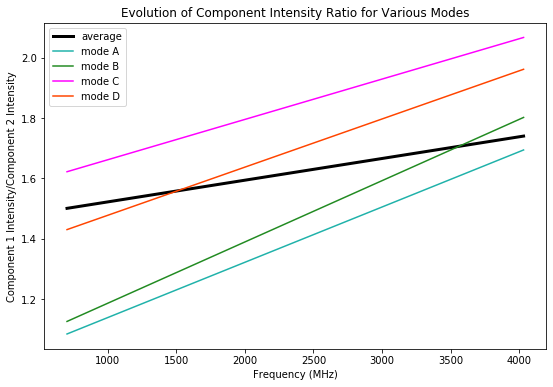

In [104]:
plt.figure(figsize=(9, 6))
plt.plot(y_sep,AVEint, color='black',lw=3,label='average',zorder=0.5)
plt.plot(y_sep,Aint, color='lightseagreen',lw=1.5,label='mode A')
plt.plot(y_sep,Bint, color='forestgreen',lw=1.5,label='mode B')
plt.plot(y_sep,Cint, color='magenta',lw=1.5,label='mode C')
plt.plot(y_sep,Dint, color='orangered',lw=1.5,label='mode D')
plt.legend()
plt.title('Evolution of Component Intensity Ratio for Various Modes')
plt.ylabel('Component 1 Intensity/Component 2 Intensity')
plt.xlabel('Frequency (MHz)')
plt.savefig('Intensities')

Text(0, 0.5, 'Intensity')

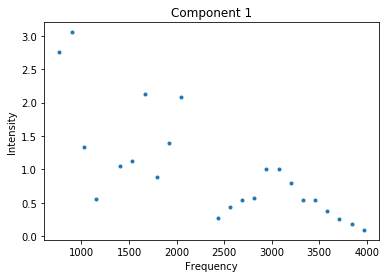

In [105]:
#Find intensity of components at each frequency and graph
intensity_comp1=[]
frequency_comp1=[]

for i in range(0,len(fit_components)):
  if fit_components[i][1][0] != 0:
    intensity_comp1.append(fit_components[i][1][1])
    frequency_comp1.append(fit_components[i][0])
    
plt.plot(frequency_comp1,intensity_comp1, '.')
plt.title('Component 1')
plt.xlabel('Frequency')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity')

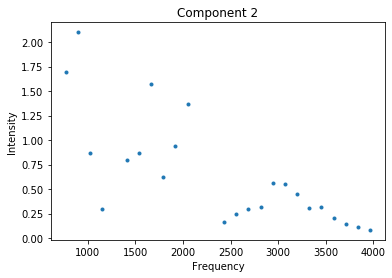

In [106]:
#Find intensity of components at each frequency and graph
intensity_comp2=[]
frequency_comp2=[]

for i in range(0,len(fit_components)):
  if fit_components[i][1][0] != 0:
    intensity_comp2.append(fit_components[i][2][1])
    frequency_comp2.append(fit_components[i][0])

plt.plot(frequency_comp2,intensity_comp2, '.')
plt.title('Component 2')
plt.xlabel('Frequency')
plt.ylabel('Intensity')

## FUNCTIONS

In [110]:
component = col.namedtuple('component','phase intensity')
ind_component = col.namedtuple('component','phase intensity width')
pulse_component = col.namedtuple('pulse_component','frequency comp1 comp2 errors')
component_separation = col.namedtuple('component_separation','frequency separation')

In [20]:
def gauss(x,amp,cen,sd):
    return amp*np.exp(-(x-cen)**2/(2*sd**2))\

def multi_gauss(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i+1]
        c = params[i+2]
        y = y +  a * np.exp( -(((x-b)**2) / (2*c**2)) )
    return y

In [21]:
"""
    Used to get the parameters, covariance matrix and errors for any number of gaussian fits, through and expected value. 
"""
def fitting_parameters(x,y,expected,bound):
    """
    bound=([],[])
    for i in range(len(expected)):
        bound[0].append(0)
        bound[1].append(np.inf)
    """
        
    params,cov=curve_fit(multi_gauss,x,y,expected, bounds=bound)
    sigma=np.sqrt(np.diag(cov))
    return params, cov, sigma

In [22]:
def sigmaClip(data, alpha=3, tol=0.1, ntrials=10):
    """
    Compute the data's median, m, and its standard deviation, sigma.
    Keep only the data that falls in the range (m-alpha*sigma,m+alpha*sigma) for some value of alpha, and discard everything else.
    This operation is repeated ntrials number of times or until the tolerance level is hit.

    Parameters:
    -----------
    data: list
        A list of floats - the data to clip
    alpha: float
        OPTIONAL - Determines the number of sigmas to use to determine the upper nad lower limits. Default=3
    tol: float
        OPTIONAL - The fractional change in the standard deviation that determines when the tolerance is hit. Default=0.1
    ntrils: int
        OPTIONAL - The maximum number of times to apply the operation. Default=10

    Returns:
    --------
    oldstd: float
        The std of the clipped data
    x: list
        The data list that contains only noise, with nans in place of 'real' data
    
    Created by Nick Swainston
    """
    x = np.copy(data)
    oldstd = np.nanstd(x)
    #When the x[x<lolim] and x[x>hilim] commands encounter a nan it produces a
    #warning. This is expected because it is ignoring flagged data from a
    #previous trial so the warning is supressed.
    old_settings = np.seterr(all='ignore')
    for trial in range(ntrials):
        median = np.nanmedian(x)

        lolim = median - alpha * oldstd
        hilim = median + alpha * oldstd
        x[x<lolim] = np.nan
        x[x>hilim] = np.nan

        newstd = np.nanstd(x)
        tollvl = (oldstd - newstd) / newstd

        if tollvl <= tol:
            np.seterr(**old_settings)
            return oldstd, x

        if trial + 1 == ntrials:
            np.seterr(**old_settings)
            return oldstd, x

        oldstd = newstd

In [23]:
def multi_gauss_ddx(x, *params):
    #derivative of gaussian
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i+1]
        c = params[i+2]
        y = y - a/c**2 * (x - b) * np.exp( -(((x-b)**2) / (2*c**2)) )
    return y

def multi_gauss_d2dx2(x, *params):
    #double derivative of gaussian
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i+1]
        c = params[i+2]
        y = y + (multi_gauss(x, a, b, c) / c**2) * (((x - b)**2)/(c**2) - 1)
    return y

def jacobian_slope(x, *params):
    """
    Evaluates the Jacobian matrix of a gaussian slope at a single point, x

    Parameters:
    -----------
    x: float
        The point to evaluate
    *params: list
        A list containing three parameters per gaussian component in the order: Amp, Mean, Width

    Returns:
    --------
    J: numpy.matrix
        The Jacobian matrix
    """
    def dda(a, b, c, x):
        return -multi_gauss(x, a, b, c) * (x - b)/(c**2)/a
    def ddb(a, b, c, x):
        return multi_gauss(x, a, b, c) * (1 - (x - b)**2/(c**2))/c**2
    def ddc(a, b, c, x):
        return multi_gauss(x, a, b, c) * (x - b)/(c**3) * (2 - (x-b)**2/(c**2))
    J = []
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i+1]
        c = params[i+2]
        mypars = [a, b, c, x]
        J.append(dda(*mypars))
        J.append(ddb(*mypars))
        J.append(ddc(*mypars))
    J = np.asmatrix(J)
    return J

In [24]:
def find_x_err(x, popt, pcov):
    """
    Finds the error in the horizontal position of a gaussian fit at the point x.
    Uses the equation sigma_x = sigma_y/d2ydx2 where:
    sigma_x = error in x
    d2ydx2 = second derivative of the gaussian function at point x
    sigma_y = sqrt.J*C*J_T
    J = Jacobian evalutated at point x
    C = covariance matrix of gaussian fit
    J_T = transposed jacobian

    Parameters:
    -----------
    x: list
        A list of points to evaluate the error at
    popt: list
        The parameters used to describe the gaussian fit
    pcov: numpy.matrix
        The covariance matrix corresponding to popt

    Returns:
    --------
    x_err: list
        The error evaluated at each point, x
    """
    x_err = []
    for i, point in enumerate(x):
        J = jacobian_slope(point, *popt)
        d2dx2 = multi_gauss_d2dx2(point, *popt)
        JC = np.matmul(J, pcov)
        sigma_y = np.sqrt( np.matmul(JC, np.transpose(J)).item(0) )
        x_err.append(sigma_y / abs(d2dx2))
    return x_err

In [25]:
def find_minima_maxima_gauss(popt, pcov, x_length):
    """
    Finds all peaks of a gaussian function, where the derivative is equal to zero. 

    Parameters:
    -----------
    popt: list
        A list of length 3N where N is the number of gaussians. This list contains the parameters amp, mean, centre respectively
    x_length: int
        The length of the list used to fit the gaussian

    Returns:
    --------
    minima: list
        A list of the minimum points of the fit
    maxima: list
        A list of the maximum points of the fit
    """
    #Create the derivative list and spline it to find roots
    x = np.linspace(0, x_length-1, x_length)
    dy = multi_gauss_ddx(x, *popt)
    spline_dy = UnivariateSpline(x, dy, s=0)
    roots = spline_dy.roots()
    
    #Find which are max and min
    maxima = []
    minima = []
    for root in roots:
        idx = int(root + 0.5)
        if dy[idx-1] > dy[idx]:
            maxima.append(root)
        else:
            minima.append(root)            
            
    minima_e = find_x_err(minima, popt, pcov)
    maxima_e = find_x_err(maxima, popt, pcov)
    
    return minima, maxima, minima_e, maxima_e

In [26]:
def gauss_peaks(fit, nofreqband, freqband, pcov, params, freq_low, freq_high, noise, data = 'parkes', freq=0):
    """
    Find the peaks of a gaussian fit, take the highest two and create a profile_comp.
    Also converts the phase into degrees and the frequency into MHz.
    
    Parameters:
    -----------
    fit: list
        the gaussian fit to find peaks of
    nofreqband: int
        total number of frequency bins 
    freqband: int
        current frequency band which has been fit
    pcov: list
        the covariance matrix from the fit
    params: list
        the parameters for the fit
    freq_low: int
        the lower boundary of the frequency range
    freq_high: int
        the high boundary of the frequency range
    Returns:
    --------
    profile_comp: pulse_component
        carrys information about each component at a certain frequency
    """
    
    deg_mod=360/len(fit)
    
    #Find the peaks of the fit, and the intensity at those peaks
    minima, peakpos, minima_e, err = find_minima_maxima_gauss(params, pcov, len(fit))
    peakint = multi_gauss(peakpos, *params)
    
    """
    #Removes peaks until only two highest remain - which also have to be the two outer peaks
    #If the highest do not correspond to the outer, the frequency band is not used
    while len(peakpos)>2:
        mn=min(peakint)
        peakint = list(peakint)
        rm = peakint.index(mn)
        if rm!=0 and rm!=len(peakpos)-1:
            del peakpos[rm]
            del peakint[rm]
            del err[rm]
        else:
            break 
    """

    #Assign the peaks to the correct component label, also converts phase from bins to degrees
    
    component1=0
    component2=0
    errr=[]
    
    if(max(peakint)/noise)>3:
        if data=='parkes':
            for n,p in enumerate(peakpos):
                if p>670 and p<710:
                    component1 = component(phase=(deg_mod)*peakpos[n], intensity=peakint[n])
                    errr.append(err[n])
                elif p>720:
                    component2 = component(phase=(deg_mod)*peakpos[n], intensity=peakint[n])
                    errr.append(err[n])
        elif data!='parkes' and len(peakpos)==2:
            component1 = component(phase=(deg_mod)*peakpos[0], intensity=peakint[0])
            errr.append(err[0])
            component2 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
            errr.append(err[1])
    else:
        print("Too noisey", freqband)
                
    if component1==0 or component2==0:
        component1 = component(phase=0, intensity=0)
        component2 = component(phase=0, intensity=0)
        error = 0   
        print("peaks",len(peakpos),peakpos,"band", freqband)
    else:
        error = np.array(errr)*(deg_mod)
        
    """
    if len(peakpos)==2 and (max(peakint)/noise)>3:
        component1 = component(phase=(deg_mod)*peakpos[0], intensity=peakint[0])
        component2 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
        error = np.array(err)*(deg_mod)
    elif len(peakpos)==3 and (max(peakint)/noise)>3:
        component1 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
        component2 = component(phase=(deg_mod)*peakpos[2], intensity=peakint[2])
        error = np.array(err)*(deg_mod)        
    elif len(peakpos)==4 and (max(peakint)/noise)>3:
        component1 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
        component2 = component(phase=(deg_mod)*peakpos[3], intensity=peakint[3])
        error = np.array(err)*(deg_mod)   
    else:
        component1 = component(phase=0, intensity=0)
        component2 = component(phase=0, intensity=0)
        error = 0       
   """
   
    #Converts the frequency from bins to MHz    
    if data=='parkes':
        freq=(((freq_high-freq_low)/nofreqband)*(freqband))+freq_low+((freq_high-freq_low)/(nofreqband*2))
    else:
        freq=freq[freqband]

    profile_comp = pulse_component(frequency=freq, comp1=component1, comp2=component2, errors=error)

    return profile_comp

In [27]:
def fit_peaks(fit, freqband, pcov, params, noise, frequency):
    
    deg_mod=360/len(fit)
    
    #Find the peaks of the fit, and the intensity at those peaks
    peakpos = params[1]
    paramint = params[0]
    errcov = np.sqrt(np.diag(pcov))
    err = errcov[1]
    if len(params)>3:
        peakpos=np.append(peakpos,params[4])
        paramint=np.append(paramint,params[3])
        err = np.append(err,errcov[4])
    if len(params)>6:
        peakpos=np.append(peakpos,params[7])
        paramint=np.append(paramint,params[6])
        err=np.append(err,errcov[7])

    print(peakpos)
    peakint = multi_gauss(peakpos, *params)
    print(peakint)

    #Removes peaks until only two highest remain - which also have to be the two outer peaks
    #If the highest do not correspond to the outer, the frequency band is not used
    while len(peakpos)>2:
        mn=min(paramint)
        paramint = list(paramint)
        rm = paramint.index(mn)   
        print(rm)
        peakpos=np.delete(peakpos,rm)
        peakint=np.delete(peakint,rm)
        err=np.delete(err,rm)

    #Assign the peaks to the correct component label, also converts phase from bins to degrees
    
    component1=0
    component2=0
    errr=[]
    
    if(max(peakint)/noise)>3:
        if len(peakpos)==2:
            component1 = component(phase=(deg_mod)*peakpos[0], intensity=peakint[0])
            errr.append(err[0])
            component2 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
            errr.append(err[1])
    else:
        print("Too noisey", freqband)
                
    if component1==0 or component2==0:
        component1 = component(phase=0, intensity=0)
        component2 = component(phase=0, intensity=0)
        error = 0   
        print("peaks",len(peakpos),peakpos,"band", freqband)
    else:
        error = np.array(errr)*(deg_mod)

    #Converts the frequency from bins to MHz    
    freq=frequency[freqband]
    
    profile_comp = pulse_component(frequency=freq, comp1=component1, comp2=component2, errors=error)

    return profile_comp

In [28]:
"""
    Graphing Sub-pulse operation:
    Used to get the correct x, y and error arrays created for graphing the data and finding a fit.
"""
def graphing_comp(fit_comp,comp_num):
        phase_comp=[]
        frequency_comp=[]
        comp_err=[]

        for i in range(0,len(fit_comp)):
            if fit_comp[i][comp_num][0]!=0:
                phase_comp.append(fit_comp[i][comp_num][0])
                frequency_comp.append(fit_comp[i][0])
                comp_err.append(fit_comp[i][3][comp_num-1])

        return phase_comp, frequency_comp, comp_err    

In [29]:
"""
    Used to remove outliers more than the threshold number of standard deviations from the mean. 
    Also removes points with high errors (greater than 100 degrees).
"""
def detect_outlier(frequency_comp, phase_comp, comp_err , threshold):
    phase=[]
    frequency=[]
    err=[]
    
    #Find mean and standard deviation of data
    mean_1 = np.mean(phase_comp)
    std_1 =np.std(phase_comp)
    
    for i in range(len(phase_comp)):
        #Find z score
        z_score= (phase_comp[i] - mean_1)/std_1 
        #Only include points which have a z score under the threshold value, and with errors less than 100 degrees
        if np.abs(z_score) < threshold and comp_err[i]<20:
            phase.append(phase_comp[i])
            frequency.append(frequency_comp[i])
            err.append(comp_err[i])
    return frequency, phase, err

In [30]:
def thorsett(x, A, alpha, smin):
    return (A * (x**(alpha)) + smin)
def powerlaw(x, A, alpha):
    return (A * (x**(alpha)))
def linear(x, m, c):
    return ((m * np.array(x)) + c)

In [31]:
"""
    Used to gain separation of components values and the uncertainties. 
"""
def separation_singleprofile(components_array):
    sep_array=[]
    uncert=[]

    #Go through all the different frequencies
    for i in range(0,len(components_array)):
        if components_array[i][1][0] != 0 and components_array[i][2][0] != 0:
            freq=components_array[i][0]
            #Subtract second component from first
            sep=(components_array[i][2][0]) - (components_array[i][1][0])
            single_sep=component_separation(frequency=freq, separation=sep)
            sep_array.append(single_sep)
            #Calculate uncertainty
            uncert.append(np.sqrt((components_array[i][3][0])**2 + (components_array[i][3][1])**2))
    return sep_array, uncert

In [32]:
def plot_peaks(x,y,profile_comp):
    plt.plot(x,y, lw=1)
    plt.plot(x, fit, color='red', lw=3, label='gaussian fit')

    x=[profile_comp[i][0] for i in range(1,3)]
    y=[profile_comp[i][1] for i in range(1,3)]

    plt.plot(x, y ,'X', markerfacecolor='black', markeredgecolor='black', label='peaks')

    plt.xlabel('Phase (deg)')
    plt.ylabel('Intensity')
    plt.legend()
    return

In [33]:
def component_positions(averageprofiles,expected1,bounds1,minf,maxf):
    fit_components = []
    no_freq_bands=max(averageprofiles['frequency'])+1

    #Loop thought all of the frequency bands
    for freqband in range(0,no_freq_bands):
        f = averageprofiles['frequency'] == freqband
        x=averageprofiles['phase'][f]
        y=averageprofiles['intensity'][f]

        noise = sigmaClip(y)
        error = np.nanstd(noise[1])

        #Fit the gaussians and find peaks and errors, create array with all frequencies
        #Resulting frequencies are in MHz and phase in degrees
        if len(x)!=0 and len(y)!=0:
            try:
                params,cov,sigma = fitting_parameters(x,y,expected1,bounds1)
                fit = multi_gauss(x,*params)
                profile_comp = gauss_peaks(fit, no_freq_bands, freqband, cov, params, minf,maxf,error)
            except:
                component1 = component(phase=0, intensity=0)
                component2 = component(phase=0, intensity=0)
                error = 0             
                freq=(((maxf-minf)/no_freq_bands)*(freqband))+minf+((maxf-minf)/(no_freq_bands*2))
                profile_comp = pulse_component(frequency=freq, comp1=component1, comp2=component2, errors=error)
            fit_components.append(profile_comp)
    return fit_components

In [34]:
def plot_comp_movement(fit_components,title,colour,comnum,outlierrem):
    #Separate the array into x and y axis of phase and frequency which can be graphed
    phase_comp1, frequency_comp1, comp1_err=graphing_comp(fit_components,comnum)
    #Plot points
    #plt.errorbar(phase_comp1,frequency_comp1, xerr=comp1_err, fmt='.', lw=0.5, color='red')
    plt.title(title)
    plt.xlabel('Phase (deg)')
    plt.ylabel('Frequency')
    #Remove outliers which are greater than 'threshold' number of std away from the mean
    frequency_comp1, phase_comp1, comp1_err = detect_outlier(frequency_comp1, phase_comp1, comp1_err,outlierrem)
    #Plot outlier removed points"
    plt.errorbar(phase_comp1,frequency_comp1, xerr=comp1_err, fmt='.', lw=0.5, color=colour,label='data')
    
    #Fit the thorsett model to the component position
    y_range=list(range(minf,maxf))
    #Fit a linear 
    comp1_paramslin,comp1_covlin=curve_fit(linear,frequency_comp1,phase_comp1, maxfev=10000, sigma=comp1_err)
    comp1_fit_errorlin=np.sqrt(np.diag(comp1_covlin))
    comp1_fitlin = linear(y_range, *comp1_paramslin)
    
    #Plot linear
    #plt.plot(comp1_fitlin, y_range,color='black',lw=2, label='linear fit', zorder=1)
    #plt.legend()

    return comp1_fitlin, y_range

In [35]:
def plot_sep_movement(fit_components,title,colour,outlierrem):
    y_range=list(range(minf,maxf))
    #Gain component separation values
    component_sep, sep_error = separation_singleprofile(fit_components)
    comp_sep=[]
    frequency_forsep=[]
    #Put them into arrays for graphing
    for i in range(0,len(component_sep)):
        comp_sep.append(component_sep[i][1])
        frequency_forsep.append(component_sep[i][0])
    
    #Plot points
    #plt.errorbar(frequency_forsep, comp_sep, yerr=sep_error, color='red', fmt='.', lw=0.5)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('\u0394\u03B8 (deg)')
    #Remove outliers
    frequency_forsep, comp_sep, sep_error = detect_outlier(frequency_forsep, comp_sep, sep_error, outlierrem)
    #Plot points with outliers removed
    plt.errorbar(frequency_forsep, comp_sep, yerr=sep_error, color=colour, fmt='.', lw=0.5, label='data')
    plt.title(title)
    
    #Create a thorsett fit
    expect=(703,0.5,10)
    sep_params,sep_cov=curve_fit(thorsett,frequency_forsep,comp_sep, expect, maxfev=10000, sigma=sep_error, bounds=([0,-1,-np.inf],[np.inf,0.5,np.inf]))
    sep_fit_error=np.sqrt(np.diag(sep_cov))
    separation_fit=thorsett(y_range,*sep_params)
    
    plt.plot(y_range,separation_fit, color='lightgrey',lw=1,label='empirical fit',zorder=0.1)
    return y_range, separation_fit, sep_params

In [36]:
def find_widths(profile, popt, pcov):
    #perform spline operations on the fit
    x = np.linspace(0, len(profile)-1, len(profile))
    fit = multi_gauss(x, *popt)
    amp_fit = max(fit) - min(fit)
    spline10 = UnivariateSpline(x, fit - np.full(len(x), 0.1*amp_fit), s=0)
    spline50 = UnivariateSpline(x, fit - np.full(len(x), 0.5*amp_fit), s=0)

    #find W10, W50 and Wscat
    W10_roots = spline10.roots()
    W50_roots = spline50.roots()
    W10 = W10_roots[-1] - W10_roots[0]
    W50 = W50_roots[-1] - W50_roots[0]

    #W10 root errors
    err_10 = find_x_err(W10_roots, popt, pcov)
    W10_e = np.sqrt(err_10[0]**2 + err_10[-1]**2)

    #W50 root errors
    err_50 = find_x_err(W50_roots, popt, pcov)
    W50_e = np.sqrt(err_50[0]**2 + err_50[-1]**2)
    
    return W10, W50, W10_e, W50_e

In [37]:
def plot_intensities(fit_components, title, colour):  
    #Find intensity of component1
    intensity_comp1=[]
    frequency_comp1=[]
    intensity_comp2=[]
    frequency_comp2=[]

    for i in range(0,len(fit_components)):
        if fit_components[i][1][0] != 0:
            intensity_comp1.append(fit_components[i][1][1])
            frequency_comp1.append(fit_components[i][0])
            intensity_comp2.append(fit_components[i][2][1])
            frequency_comp2.append(fit_components[i][0])

    int_ratio=np.array(intensity_comp1)/np.array(intensity_comp2)
    

    plt.plot(frequency_comp2,int_ratio, '.', lw=0.5, color=colour,label='data')
    plt.title('Intensity Ratio of Component 1/Component 2')
    plt.xlabel('Frequency')
    plt.ylabel('Intensity Ratio')
    plt.title(title)
    
    #Fit the thorsett model to the component position
    y_range=list(range(minf,maxf))
    #Fit a linear 
    ratio_paramslin,ratio_covlin=curve_fit(linear,frequency_comp2,int_ratio, maxfev=10000) #sigma=comp1_err)
    ratio_fit_errorlin=np.sqrt(np.diag(ratio_covlin))
    ratio_fitlin = linear(y_range, *ratio_paramslin)
    
    #Plot linear
    plt.plot(y_range,ratio_fitlin,color='lightgrey',lw=1, label='linear fit', zorder=1)
    plt.legend()
    
    return y_range, ratio_fitlin, ratio_paramslin